In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/MyDrive/Project Soccer/PLAYERS.csv")

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Apps       671 non-null    float64
 1   Mins/Gm    671 non-null    float64
 2   Height     671 non-null    float64
 3   Weight     671 non-null    float64
 4   Age        671 non-null    int64  
 5   Av Rat     671 non-null    float64
 6   Gls        671 non-null    float64
 7   Shot %     671 non-null    float64
 8   Ch C/90    671 non-null    float64
 9   Asts/90    671 non-null    float64
 10  K Ps/90    671 non-null    float64
 11  Pas %      671 non-null    float64
 12  Cr C/A     671 non-null    float64
 13  Drb/90     671 non-null    float64
 14  Distance   671 non-null    float64
 15  Hdr %      671 non-null    float64
 16  K Tck      671 non-null    float64
 17  Fls        671 non-null    float64
 18  Int/90     671 non-null    float64
 19  PoM        671 non-null    float64
 20  Off       

In [5]:
X = df.drop("CA",axis=1)   
y = df["CA"]

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=42)

Gradient Boosting

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
gbr = GradientBoostingRegressor()

In [9]:
param_grid = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [1, 3, 5],
              'min_samples_split': [2, 4, 6],
              'max_features': [None, 'sqrt', 'log2']}

In [10]:
grid = GridSearchCV(gbr, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.05, 0.01],
                         'max_depth': [1, 3, 5],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 200, 300]})

In [11]:
best_params = grid.best_params_
print("Best parameters: ", best_params)

Best parameters:  {'learning_rate': 0.05, 'max_depth': 3, 'max_features': None, 'min_samples_split': 6, 'n_estimators': 100}


In [12]:
gbr = GradientBoostingRegressor(**best_params)#**best_params
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, min_samples_split=6)

In [13]:
y_pred = gbr.predict(X_test)

In [14]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", rmse)

Root Mean Squared Error:  7.185766809407729


In [15]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score: ", r2)

R^2 Score:  0.8529257212970505


In [16]:
r2 = r2_score(y_test, y_pred)
print("R^2 Score: ", r2)

# Calculate the number of samples
n = y_test.shape[0]

# Calculate the number of features
k = X_test.shape[1]

# Calculate adjusted R^2 score
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)
print("Adjusted R^2 Score: ", adj_r2)

R^2 Score:  0.8529257212970505
Adjusted R^2 Score:  0.828241926269982


In [17]:
from sklearn.metrics import mean_absolute_error

...

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

Mean Absolute Error:  5.421221524414973


In [18]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error,: ", mse,)

Mean Squared Error,:  51.63524463918574


In [19]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [20]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [50, 100, 150],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [1, 5, 10]}

In [21]:
xgb = XGBRegressor()#objective='reg:linear'

In [22]:
grid = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_absolute_error')

In [23]:
grid.fit(X_train, y_train)


[05:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:33:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.05, 0.1, 0.15],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 150],
                         'reg_lambda': [1, 5, 10]},
             scoring='neg_mean_absolute_error')

In [24]:
print('Best parameters found by GridSearchCV:', grid.best_params_)

Best parameters found by GridSearchCV: {'gamma': 0.1, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_lambda': 5}


In [25]:
xgb_best = XGBRegressor( max_depth=grid.best_params_['max_depth'], 
                        learning_rate=grid.best_params_['learning_rate'], 
                        n_estimators=grid.best_params_['n_estimators'], 
                        gamma=grid.best_params_['gamma'],
                        reg_lambda=grid.best_params_['reg_lambda'])

In [26]:
xgb_best.fit(X_train, y_train)

[05:34:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(gamma=0.1, learning_rate=0.05, reg_lambda=5)

In [27]:
y_pred = xgb_best.predict(X_test)

In [28]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [29]:
print('Mean Absolute Error:', mae)
print('R2 Score:', r2)
print('Adjusted R2 Score:', adj_r2)
print('RMSE:', rmse)

Mean Absolute Error: 5.946012269882929
R2 Score: 0.8262706487859481
Adjusted R2 Score: 0.7971132751556178
RMSE: 7.809825941468857


In [30]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error,: ", mse,)

Mean Squared Error,:  60.993381236039916


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Apps       671 non-null    float64
 1   Mins/Gm    671 non-null    float64
 2   Height     671 non-null    float64
 3   Weight     671 non-null    float64
 4   Age        671 non-null    int64  
 5   Av Rat     671 non-null    float64
 6   Gls        671 non-null    float64
 7   Shot %     671 non-null    float64
 8   Ch C/90    671 non-null    float64
 9   Asts/90    671 non-null    float64
 10  K Ps/90    671 non-null    float64
 11  Pas %      671 non-null    float64
 12  Cr C/A     671 non-null    float64
 13  Drb/90     671 non-null    float64
 14  Distance   671 non-null    float64
 15  Hdr %      671 non-null    float64
 16  K Tck      671 non-null    float64
 17  Fls        671 non-null    float64
 18  Int/90     671 non-null    float64
 19  PoM        671 non-null    float64
 20  Off       

In [33]:
df.describe()

,Apps,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Shot %,Ch C/90,Asts/90,...,Hdr %,K Tck,Fls,Int/90,PoM,Off,Tck R,CA,Dist/Mins,Value
count,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,...,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,671.000000,6.710000e+02
mean,14.099851,86.794122,183.891207,77.080477,26.192250,6.992906,0.648286,0.241997,0.246483,0.080462,...,0.758077,1.363636,15.766021,2.005440,0.497765,1.013413,0.823040,118.050671,0.118225,8.310863e+06
std,3.604787,5.032052,6.196901,6.580801,3.224486,0.184171,0.893589,0.173754,0.299076,0.091102,...,0.090154,1.346789,7.421255,0.888635,0.699410,1.239210,0.117269,18.116632,0.023506,1.644512e+07
min,11.000000,69.500000,165.000000,56.000000,18.000000,6.440000,0.000000,0.000000,0.000000,0.000000,...,0.420000,0.000000,2.000000,0.110000,0.000000,0.000000,0.440000,70.000000,0.022826,1.250000e+03
25%,12.000000,83.890110,180.000000,73.000000,24.000000,6.860000,0.000000,0.115000,0.020000,0.000000,...,0.710000,0.000000,10.000000,1.185000,0.000000,0.000000,0.750000,105.000000,0.112658,2.112500e+05
50%,13.000000,88.214286,184.000000,77.000000,26.000000,6.980000,0.000000,0.250000,0.150000,0.070000,...,0.770000,1.000000,15.000000,2.110000,0.000000,1.000000,0.830000,117.000000,0.119616,1.425000e+06
75%,15.000000,90.000000,188.000000,81.000000,29.000000,7.110000,1.000000,0.330000,0.325000,0.130000,...,0.820000,2.000000,20.000000,2.710000,1.000000,1.000000,0.910000,130.000000,0.135125,6.900000e+06
max,32.000000,103.470588,200.000000,96.000000,36.000000,7.560000,4.000000,0.750000,1.570000,0.410000,...,0.930000,5.000000,46.000000,4.180000,3.000000,6.000000,1.000000,172.000000,0.160410,8.700000e+07


In [34]:
C = df.drop("CA",axis=1)

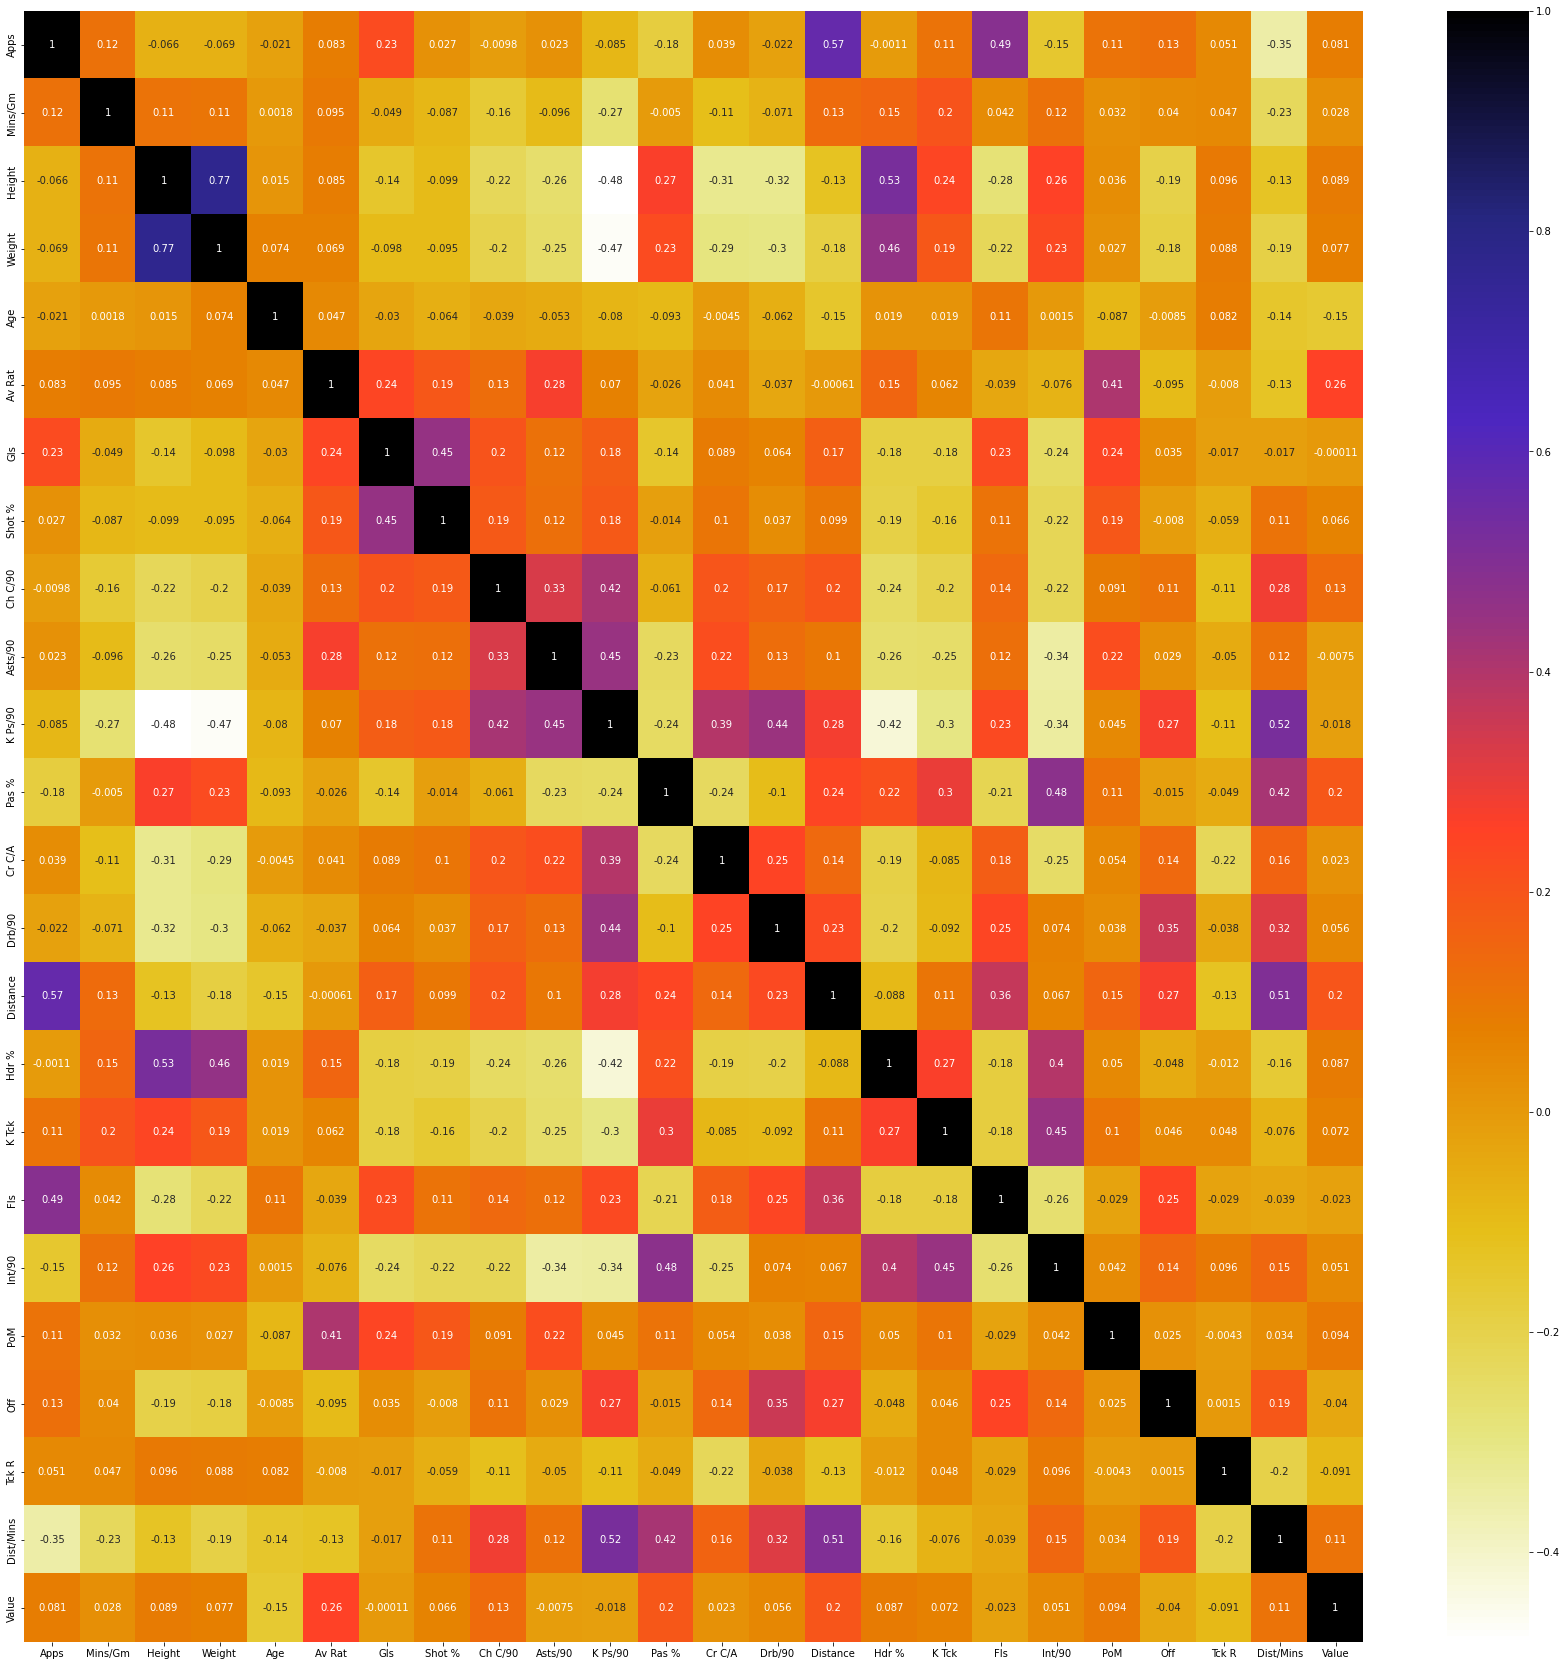

In [35]:
import seaborn as sns
#Using Pearson Correlation
plt.figure(figsize=(30,30))
cor = C.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [36]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [39]:
corr_features = correlation(C, 0.75)
len(set(corr_features))

1

In [40]:
corr_features

{'Weight'}

In [42]:
df

,Apps,Mins/Gm,Height,Weight,Age,Av Rat,Gls,Shot %,Ch C/90,Asts/90,...,Hdr %,K Tck,Fls,Int/90,PoM,Off,Tck R,CA,Dist/Mins,Value
0,15.0,77.400000,172.0,69.0,25,6.84,0.0,0.38,0.08,0.39,...,0.71,0.0,19.0,1.47,0.0,0.0,0.76,79,0.129457,1250.0
1,20.0,86.900000,192.0,86.0,22,7.15,1.0,0.30,0.00,0.26,...,0.80,2.0,17.0,1.40,1.0,1.0,0.88,95,0.058631,550000.0
2,11.0,85.727273,172.0,66.0,22,7.03,1.0,0.50,0.11,0.00,...,0.80,0.0,18.0,3.53,0.0,2.0,0.84,81,0.132662,3000.0
3,11.0,88.818182,190.0,80.0,30,6.96,0.0,0.20,0.20,0.00,...,0.79,4.0,14.0,3.04,1.0,0.0,0.85,85,0.116888,6000.0
4,11.0,90.000000,184.0,70.0,23,6.96,3.0,0.32,0.00,0.09,...,0.65,5.0,5.0,3.18,1.0,0.0,1.00,100,0.108788,17000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,17.0,90.000000,180.0,77.0,32,7.42,0.0,0.33,1.25,0.12,...,0.84,0.0,16.0,3.12,1.0,2.0,0.92,155,0.124183,24250000.0
667,19.0,90.000000,190.0,74.0,23,7.36,0.0,0.23,0.29,0.11,...,0.89,3.0,22.0,2.32,1.0,1.0,0.65,172,0.115965,75000000.0
668,15.0,82.866667,189.0,76.0,34,7.22,1.0,0.25,0.56,0.14,...,0.74,0.0,19.0,0.72,0.0,0.0,0.83,154,0.134352,10250000.0
669,13.0,86.076923,184.0,76.0,27,6.81,1.0,0.33,1.08,0.16,...,0.72,1.0,11.0,2.09,0.0,4.0,0.48,152,0.142002,80500000.0
